# The Predictor to Permit Loan

***

## A note on the Dataset
#### This data-set was obtained from Kaggle (https://www.kaggle.com/zhijinzhai/loandata/data)

##### Some information about the data columns:

**Loan_id** A unique loan number assigned to each loan customers

**Loan_status** Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

**Principal Basic** principal loan amount at the origination terms Can be weekly (7 days), biweekly, and monthly payoff schedule

**Effective_date** When the loan got originated and took effects

**Due_date Since** it’s one-time payoff schedule, each loan has one single due date

**Paidoff_time** The actual time a customer pays off the loan

**Pastdue_days** How many days a loan has been past due

**Age**, **education**, **gender** A customer’s basic demographic information


## k-Nearest Neighbour

In [18]:
import itertools
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline


In [19]:
data_frame = pd.read_csv("Loan_payments_data.csv")

In [3]:
# print ("Shape of dataset before cleaning: ", data_frame.size)

# data_frame = data_frame.dropna()
# data_frame = data_frame.reset_index(drop=True)
# print ("Shape of dataset after cleaning: ", data_frame.size)
# data_frame.head(5)

# Shape of dataset before cleaning:  5500
# Shape of dataset after cleaning:  1100

In [20]:
data_frame.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [21]:
data_frame.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [22]:
data1 = data_frame.copy()

In [23]:
data_frame['Principal'].unique()

array([1000,  300,  800,  900,  700,  500])

In [24]:
data_frame['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

#### There are 3 types of loan status, Now let me explain the following:

**'PAIDOFF'** :  means those people gave their money before or on due date without the help of any external agencies


**'COLLECTION'** :  Risky people, they havenot given the money and the lenders will have to acquire the money with the help of 
some 3rd party organisations


**'COLLECTION_PAIDOFF'** : These people have given the money after the 3rd party organisations have forced them to do so.

#### We will see that there are categorical string values which are needed to be converted to numeric "one-hot-encoded" values for better working of the algorithm and reducing the dimension

In [26]:
#  For converting it to One hot encoded values

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
#data_frame['loan_status']=le.fit_transform(data_frame['loan_status'])
data_frame['Gender']=le.fit_transform(data_frame['Gender'])
data_frame['education']=le.fit_transform(data_frame['education'])
data_frame['past_due_days']=le.fit_transform(data_frame['past_due_days'])

In [27]:
df =data1[data_frame['past_due_days'] ==60 ]
df.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
299,xqd20160300,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 11:00,NaN,28,college,male


In [28]:
# convert 'PAIDOFF' to 1 and other two categories to 0
data_frame['loan_status'] = data_frame['loan_status'].map({'PAIDOFF': 1, 'COLLECTION': 0, 'COLLECTION_PAIDOFF': 0})

In [29]:
data_frame['Principal'].value_counts()

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64

In [30]:
data_frame.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,1,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,83,45,1,1
1,xqd20168902,1,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,173,50,0,0
2,xqd20160003,1,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,172,33,0,0
3,xqd20160004,1,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,171,27,3,1
4,xqd20160005,1,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,170,28,3,0


#### A plot of the histogram showing the basic statistics of the Principal amount taken 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f271f539400>]],
      dtype=object)

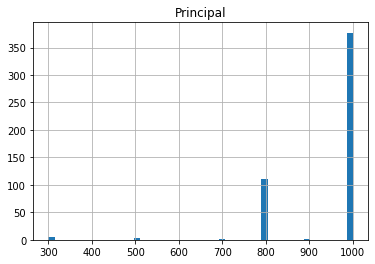

In [33]:
data_frame.hist(column='Principal', bins=50)

##### Note 0 = 'PAIDOFF', 1 = 'COLLECTION', and 1 = 'COLLECTION_PAIDOFF' are the mapped values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f271f3ea0d0>]],
      dtype=object)

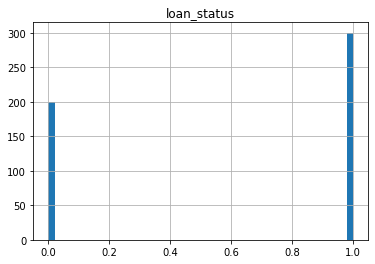

In [35]:
data_frame.hist(column='loan_status', bins=50)
# Note 0 = 'PAIDOFF', 1 = 'COLLECTION', and 2 = 'COLLECTION_PAIDOFF'

In [16]:
# Creating a new column for storing the difference between due date and paid off time
# data_frame['diff_effective_due'] = data_frame['due_date'].sub(data_frame['effective_date'], axis=0)


In [36]:
data_frame.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

#### Now we create the features X for training

In [37]:
X = data_frame[[ 'Principal','terms', 'past_due_days', 'Gender', 'age', 'education']] .values  #.astype(float)
X[0:5]

array([[1000,   30,   83,    1,   45,    1],
       [1000,   30,  173,    0,   50,    0],
       [1000,   30,  172,    0,   33,    0],
       [1000,   15,  171,    1,   27,    3],
       [1000,   30,  170,    0,   28,    3]])

#### and y for output labels

In [38]:
y = data_frame['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [39]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.49,  0.9 , -0.31,  0.43,  2.28, -0.65],
       [ 0.49,  0.9 ,  0.54, -2.34,  3.11, -1.52],
       [ 0.49,  0.9 ,  0.53, -2.34,  0.31, -1.52],
       [ 0.49, -0.98,  0.52,  0.43, -0.68,  1.08],
       [ 0.49,  0.9 ,  0.51, -2.34, -0.51,  1.08]])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 6) (400,)
Test set: (100, 6) (100,)


In [41]:
from sklearn import metrics
# print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
# print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

#### Let us see which K values suits the dataset more

In [44]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93, 0.9 , 0.92, 0.88, 0.9 , 0.88, 0.91, 0.93, 0.93, 0.92, 0.92,
       0.93, 0.93, 0.9 , 0.91, 0.9 , 0.9 , 0.91, 0.9 , 0.91, 0.9 , 0.9 ,
       0.88, 0.9 , 0.88, 0.89, 0.87, 0.87, 0.88])

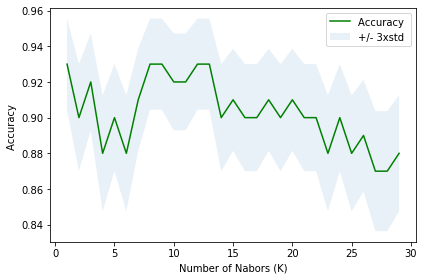

In [45]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [46]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.93 with k= 1


#### So, by using the features of the given dataset, we find K = 1, 8 and 9, wierd isn't it? But this dataset have a pattern like this.

In [47]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:656: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


0.88

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[57  9]
 [ 3 31]]


Confusion matrix, without normalization
[[57  9]
 [ 3 31]]


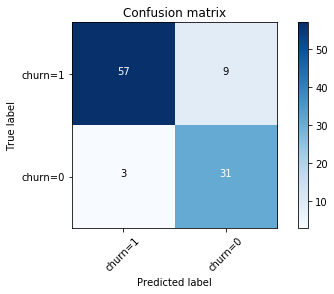

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [50]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        34
           1       0.95      0.86      0.90        66

    accuracy                           0.88       100
   macro avg       0.86      0.89      0.87       100
weighted avg       0.89      0.88      0.88       100



***

<pre>











</pre>

# Decision Tree Method

In [218]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [219]:
data_frame = pd.read_csv("Loan_payments_data.csv")

In [220]:
#  For converting it to One hot encoded values

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
# let us keep the default 3 classes of the dataframe...
data_frame['loan_status']=le.fit_transform(data_frame['loan_status'])
data_frame['Gender']=le.fit_transform(data_frame['Gender'])
data_frame['education']=le.fit_transform(data_frame['education'])
data_frame['past_due_days']=le.fit_transform(data_frame['past_due_days'])
data_frame = data_frame.drop(['Loan_ID','effective_date', 'due_date','paid_off_time'], axis=1)

In [221]:
data_frame.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,2,1000,30,83,45,1,1
1,2,1000,30,173,50,0,0
2,2,1000,30,172,33,0,0
3,2,1000,15,171,27,3,1
4,2,1000,30,170,28,3,0


In [222]:
X = data_frame[['Principal', 'terms', 'past_due_days', 'age', 'education', 'Gender']].values
X[0:5]

array([[1000,   30,   83,   45,    1,    1],
       [1000,   30,  173,   50,    0,    0],
       [1000,   30,  172,   33,    0,    0],
       [1000,   15,  171,   27,    3,    1],
       [1000,   30,  170,   28,    3,    0]])

In [223]:
y = data_frame["loan_status"]
y[0:5]

0    2
1    2
2    2
3    2
4    2
Name: loan_status, dtype: int64

In [224]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=5)

In [225]:
print(X_trainset.shape)
print(y_trainset.shape)


(350, 6)
(350,)


In [226]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
loanTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [227]:
loanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [228]:
predTree = loanTree.predict(X_testset)

In [229]:
print (predTree [0:5])
print (y_testset [0:5])


[2 1 2 2 1]
241    2
448    1
75     2
212    2
481    1
Name: loan_status, dtype: int64


#### Printing the accuracy of the decision tree

In [230]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9666666666666667


In [231]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [232]:
pd.DataFrame.from_records(X)

,0,1,2,3,4,5
0,1000,30,83,45,1,1
1,1000,30,173,50,0,0
2,1000,30,172,33,0,0
3,1000,15,171,27,3,1
4,1000,30,170,28,3,0
...,...,...,...,...,...,...
495,1000,30,2,28,1,1
496,1000,15,11,26,1,1
497,800,15,2,30,3,1
498,1000,30,0,38,3,0


In [235]:
#couldn't resolve the issue to draw this graph


dot_data = StringIO()
filename = "loanTree.png"
featureNames = [ "Principal","terms","past_due_days","age","education","Gender"]
targetNames = ["loan_status"]
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= "loan_status", filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

InvocationException: GraphViz's executables not found

[Text(251.10000000000002, 206.56799999999998, 'X[2] <= 32.5\nentropy = 1.362\nsamples = 350\nvalue = [70, 68, 212]'),
 Text(209.25, 184.824, 'X[2] <= 24.5\nentropy = 1.0\nsamples = 138\nvalue = [70, 68, 0]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 16.5\nentropy = 0.31\nsamples = 72\nvalue = [4, 68, 0]'),
 Text(125.55000000000001, 141.336, 'entropy = 0.0\nsamples = 61\nvalue = [0, 61, 0]'),
 Text(209.25, 141.336, 'X[2] <= 22.0\nentropy = 0.946\nsamples = 11\nvalue = [4, 7, 0]'),
 Text(167.4, 119.592, 'X[3] <= 30.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5, 0]'),
 Text(125.55000000000001, 97.848, 'X[2] <= 19.0\nentropy = 0.863\nsamples = 7\nvalue = [2, 5, 0]'),
 Text(83.7, 76.10399999999998, 'X[4] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3, 0]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'X[4] <= 2.0\nentropy = 1.0\nsamples = 4\nvalue = [2, 2, 0]'),
 Text(83.7, 32.615999999999985, 'entro

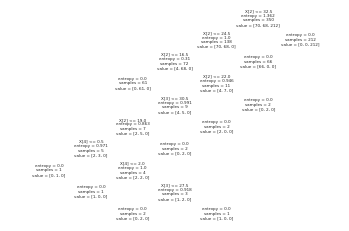

In [234]:
tree.plot_tree(loanTree.fit(X_trainset,y_trainset)) 

***

<pre>









</pre>

# Support Vector Machine

In [67]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [68]:
data_frame = pd.read_csv("Loan_payments_data.csv")
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
# let us keep the default 3 classes of the dataframe...
#data_frame['loan_status']=le.fit_transform(data_frame['loan_status'])
data_frame['Gender']=le.fit_transform(data_frame['Gender'])
data_frame['education']=le.fit_transform(data_frame['education'])
data_frame['past_due_days']=le.fit_transform(data_frame['past_due_days'])
# convert 'PAIDOFF' to 1 and other two categories to 0
data_frame['loan_status'] = data_frame['loan_status'].map({'PAIDOFF': 1, 'COLLECTION': 0, 'COLLECTION_PAIDOFF': 0})


In [69]:
data_frame.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,1,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,83,45,1,1
1,xqd20168902,1,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,173,50,0,0
2,xqd20160003,1,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,172,33,0,0
3,xqd20160004,1,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,171,27,3,1
4,xqd20160005,1,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,170,28,3,0


#### Lets plot the dataset in terms of the **age** and **past_due_date** with two categories i.e., defaulters and paidoffs

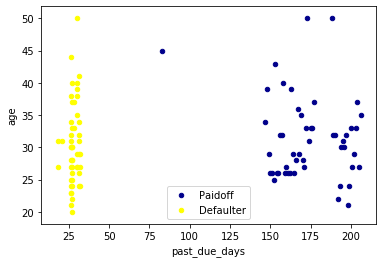

In [84]:
ax = data_frame[data_frame['loan_status'] == 1][0:50].plot(kind='scatter', x='past_due_days', y='age', color='DarkBlue', label='Paidoff');
data_frame[data_frame['loan_status'] == 0][0:50].plot(kind='scatter', x='past_due_days', y='age', color='Yellow', label='Defaulter', ax=ax);
plt.show()

#### Creating the X and Y labels for training

In [85]:
X = data_frame[['Principal', 'terms', 'past_due_days', 'age', 'education', 'Gender']].values
X[0:5]

array([[1000,   30,   83,   45,    1,    1],
       [1000,   30,  173,   50,    0,    0],
       [1000,   30,  172,   33,    0,    0],
       [1000,   15,  171,   27,    3,    1],
       [1000,   30,  170,   28,    3,    0]])

In [86]:
data_frame['loan_status'].describe

<bound method NDFrame.describe of 0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: loan_status, Length: 500, dtype: int64>

In [87]:
y = np.asarray(data_frame['loan_status'])
y [0:5]

array([1, 1, 1, 1, 1])

In [74]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 6) (400,)
Test set: (100, 6) (100,)


In [75]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
yhat = clf.predict(X_test)
yhat[0:5]

array([1, 1, 1, 0, 1])

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [78]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        34
           1       1.00      0.86      0.93        66

    accuracy                           0.91       100
   macro avg       0.90      0.93      0.90       100
weighted avg       0.93      0.91      0.91       100

Confusion matrix, without normalization
[[34  0]
 [ 9 57]]


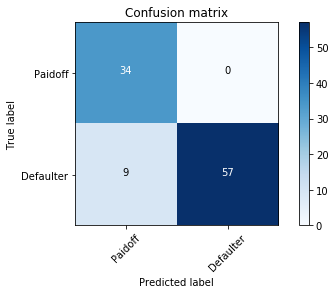

In [79]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Paidoff','Defaulter'],normalize= False,  title='Confusion matrix')

#### Plotting the f1-score

In [80]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.911967057332911

#### Plotting the similarity score

In [81]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:656: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


0.91

***

<pre>







</pre>

# Logistic Regression

In [88]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [89]:
data_frame = pd.read_csv("Loan_payments_data.csv")

In [90]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
# let us keep the default 3 classes of the dataframe...
#data_frame['loan_status']=le.fit_transform(data_frame['loan_status'])
data_frame['Gender']=le.fit_transform(data_frame['Gender'])
data_frame['education']=le.fit_transform(data_frame['education'])
data_frame['past_due_days']=le.fit_transform(data_frame['past_due_days'])
# convert 'PAIDOFF' to 1 and other two categories to 0
data_frame['loan_status'] = data_frame['loan_status'].map({'PAIDOFF': 1, 'COLLECTION': 0, 'COLLECTION_PAIDOFF': 0})

In [95]:
data_frame.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,1,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,83,45,1,1
1,xqd20168902,1,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,173,50,0,0
2,xqd20160003,1,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,172,33,0,0
3,xqd20160004,1,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,171,27,3,1
4,xqd20160005,1,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,170,28,3,0


#### Lets prepare the dataset

In [96]:
X = data_frame[['Principal', 'terms', 'past_due_days', 'age', 'education', 'Gender']].values
X[0:5]

array([[1000,   30,   83,   45,    1,    1],
       [1000,   30,  173,   50,    0,    0],
       [1000,   30,  172,   33,    0,    0],
       [1000,   15,  171,   27,    3,    1],
       [1000,   30,  170,   28,    3,    0]])

In [97]:
y = np.asarray(data_frame['loan_status'])
y [0:5]

array([1, 1, 1, 1, 1])

In [98]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.49,  0.9 , -0.31,  2.28, -0.65,  0.43],
       [ 0.49,  0.9 ,  0.54,  3.11, -1.52, -2.34],
       [ 0.49,  0.9 ,  0.53,  0.31, -1.52, -2.34],
       [ 0.49, -0.98,  0.52, -0.68,  1.08,  0.43],
       [ 0.49,  0.9 ,  0.51, -0.51,  1.08, -2.34]])

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 6) (400,)
Test set: (100, 6) (100,)


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [102]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.5 , 0.5 ],
       [0.13, 0.87],
       [0.29, 0.71],
       [0.59, 0.41],
       [0.43, 0.57]])

## Evaluation

## jaccard index

In [103]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:656: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


0.9

In [104]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[56 10]
 [ 0 34]]


#### Plotting the confusion matrix

Confusion matrix, without normalization
[[56 10]
 [ 0 34]]


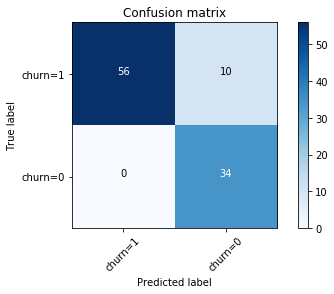

In [105]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [106]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        34
           1       1.00      0.85      0.92        66

    accuracy                           0.90       100
   macro avg       0.89      0.92      0.89       100
weighted avg       0.92      0.90      0.90       100



#### Plotting the logloss

In [107]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.44828112483515814

***

<pre>












</pre>

## Some Extra Analysis on the dataset

####  (may skip if you want to save time, just for playing around)

In [108]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [109]:
data_frame.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,1,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,83,45,1,1
1,xqd20168902,1,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,173,50,0,0
2,xqd20160003,1,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,172,33,0,0
3,xqd20160004,1,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,171,27,3,1
4,xqd20160005,1,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,170,28,3,0


In [110]:
featureset = data_frame[[ 'Principal','terms', 'past_due_days', 'Gender', 'age', 'education', 'education']]

from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[1.  , 1.  , 0.25, 1.  , 0.82, 0.33, 0.33],
       [1.  , 1.  , 0.52, 0.  , 0.97, 0.  , 0.  ],
       [1.  , 1.  , 0.52, 0.  , 0.45, 0.  , 0.  ],
       [1.  , 0.35, 0.52, 1.  , 0.27, 1.  , 1.  ],
       [1.  , 1.  , 0.51, 0.  , 0.3 , 1.  , 1.  ]])

In [111]:
import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [112]:
import pylab
import scipy.cluster.hierarchy
Z = scipy.cluster.hierarchy.linkage(D, 'complete')

<ipython-input-112-e89f68dff182>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = scipy.cluster.hierarchy.linkage(D, 'complete')


In [113]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([71, 17, 16, 36, 33, 24, 53, 53, 53, 44, 23, 63, 53, 26, 59, 44, 70,
       63, 70, 53, 53, 15, 70, 36, 53, 70,  6,  7, 53, 53, 63, 53, 51, 51,
       37,  7, 70, 55, 36, 81, 28, 37,  4, 36, 18, 59, 69, 53, 81, 60, 28,
       16, 18, 70, 69, 36, 70, 81, 10, 61, 77, 44, 70, 52, 64, 44, 77, 72,
       23, 78, 44, 64, 16, 44, 44, 72, 77, 48, 31, 15, 72, 39, 44, 43, 15,
       48, 14, 31,  6, 10, 29, 19, 68, 64, 72, 53, 64, 53, 69, 16, 59, 43,
       53, 68, 44, 53, 72, 72, 53, 39, 44, 33, 53, 53, 53, 64, 52, 69, 77,
       44, 53, 69, 36, 36, 46, 51, 54, 56,  3, 80, 54, 56, 76, 32, 34, 76,
        8, 34, 60, 76, 76, 38, 58, 25, 76, 38, 32, 24,  3,  3, 38, 34, 27,
       34, 46,  9,  3, 57, 25, 76, 57,  3, 76, 25, 57, 76, 46, 46, 57, 46,
       57, 46, 56, 46, 56, 34, 76, 46, 76, 47,  8, 22, 76, 57, 76,  9, 80,
       55, 37, 38, 51, 75,  8,  9, 37, 51, 51, 38, 75, 51, 37,  9, 55, 37,
       51, 19, 51, 51, 22, 75, 55, 70,  9, 70, 70, 33, 60,  8, 55, 75, 38,
       45, 51, 55, 80, 76

#### Hierarchical Clustering according to Principal, Age and education

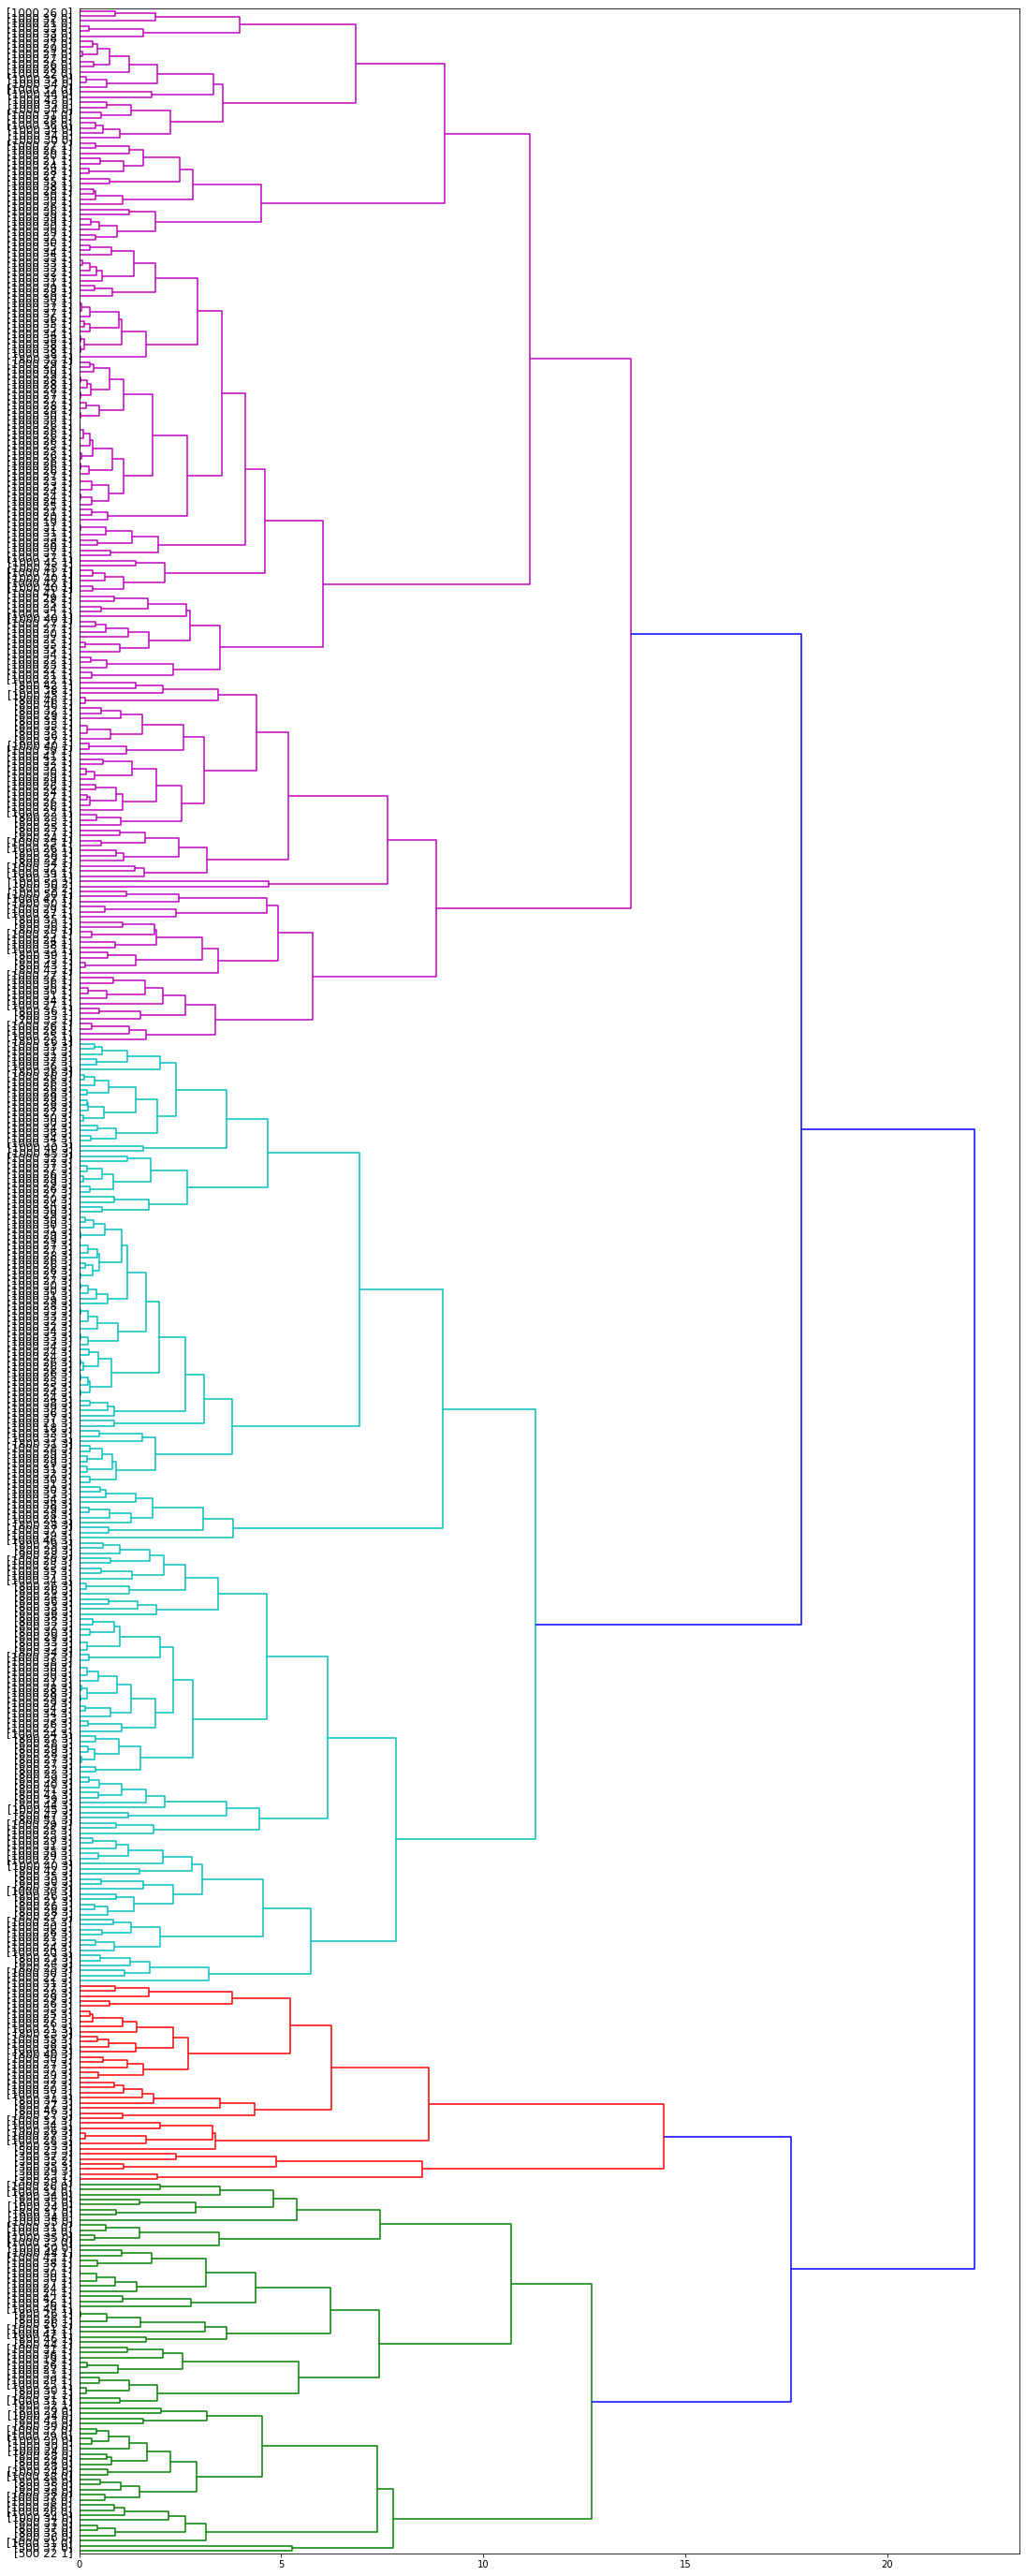

In [114]:
# loan_status 	Principal 	terms 	effective_date 	due_date 	paid_off_time 	past_due_days 	age 	education 	Gender

fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data_frame['Principal'][id], data_frame['age'][id], int(float(data_frame['education'][id])) )
    
dendro = scipy.cluster.hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [122]:


import os
import numpy as np
import pandas as pd
import datetime 
import seaborn as sns
sns.set_style("dark")

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



def my_read_file(filename):
    df = pd.read_csv(filename)
    print("{}: Reading {}.".format(now(), filename))
    print("{}: The data contains {} observations with {} columns".format(now(), df.shape[0], df.shape[1]))
    return df

def now():
    tmp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    return tmp

# Self-defined function to read dataframe and find the missing data on the columns and # of missing
def checking_na(df):
    try:
        if (isinstance(df, pd.DataFrame)):
            df_na_bool = pd.concat([df.isnull().any(), df.isnull().sum(), (df.isnull().sum()/df.shape[0])*100],
                                   axis=1, keys=['df_bool', 'df_amt', 'missing_ratio_percent'])
            df_na_bool = df_na_bool.loc[df_na_bool['df_bool'] == True]
            return df_na_bool
        else:
            print("{}: The input is not panda DataFrame".format(now()))

    except (UnboundLocalError, RuntimeError):
        print("{}: Something is wrong".format(now()))

In [123]:
loan_data = my_read_file("Loan_payments_data.csv")
print("\n\n")
print(checking_na(loan_data))


2019-12-27 02:19:20: Reading Loan_payments_data.csv.
2019-12-27 02:19:20: The data contains 500 observations with 11 columns



               df_bool  df_amt  missing_ratio_percent
paid_off_time     True     100                   20.0
past_due_days     True     300                   60.0


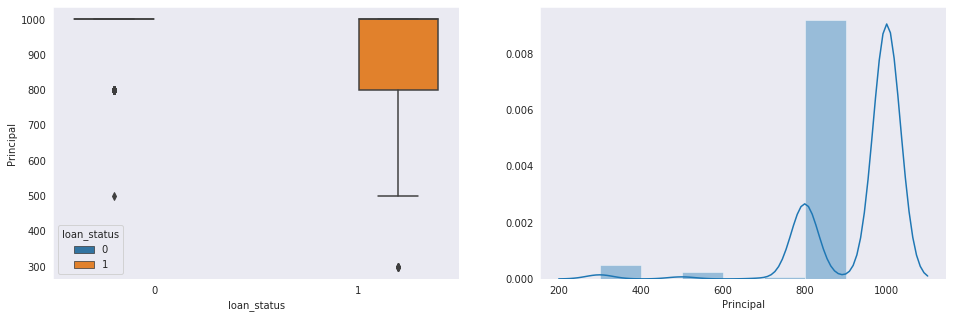

In [124]:
import seaborn as sns
sns.set_style("dark")
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(x='loan_status', y='Principal', data=data_frame, hue='loan_status', ax=axs[0])
sns.distplot(loan_data.Principal, bins=range(300, 1000, 100), ax=axs[1], kde=True)
plt.show();


['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


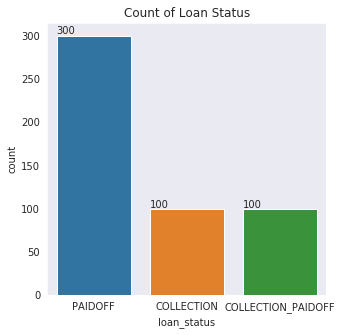

In [125]:
print(loan_data.loan_status.unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(loan_data.loan_status)
ax.set_title("Count of Loan Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()


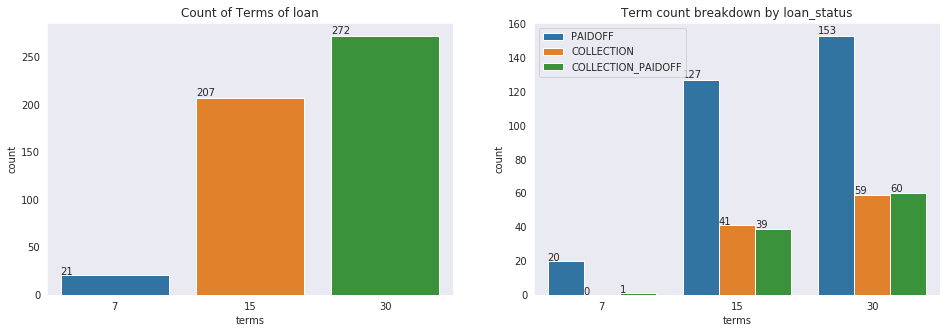

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(loan_data.terms, ax=axs[0])
axs[0].set_title("Count of Terms of loan")
for p in axs[0].patches:
    axs[0].annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

sns.countplot(x='terms', hue='loan_status', data=loan_data, ax=axs[1])
axs[1].set_title("Term count breakdown by loan_status")
for t in axs[1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1].annotate(0, (t.get_x(), 0))
    else:
        axs[1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

axs[1].legend(loc='upper left')
plt.show();


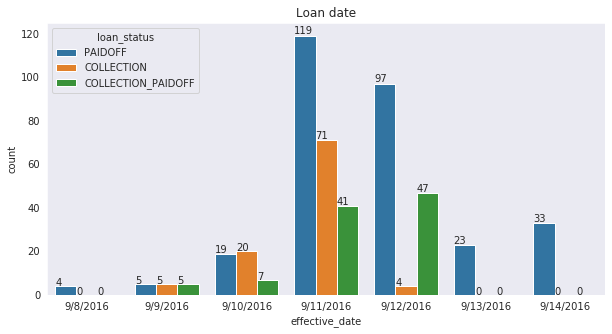

In [127]:
fig = plt.figure(figsize=(10,5))
ax = sns.countplot(x='effective_date', hue='loan_status', data=loan_data)
ax.set_title('Loan date')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
plt.show();

# Note: if we think that the day of week, or month has the significant factor to the loan status
# Below is the function which we can use to extract the year, month, or day:
# pd.DatetimeIndex(loan_data.effective_date).year
# pd.DatetimeIndex(loan_data.effective_date).month
# pd.DatetimeIndex(loan_data.effective_date).day

#### People are more prone to pay off in the last day

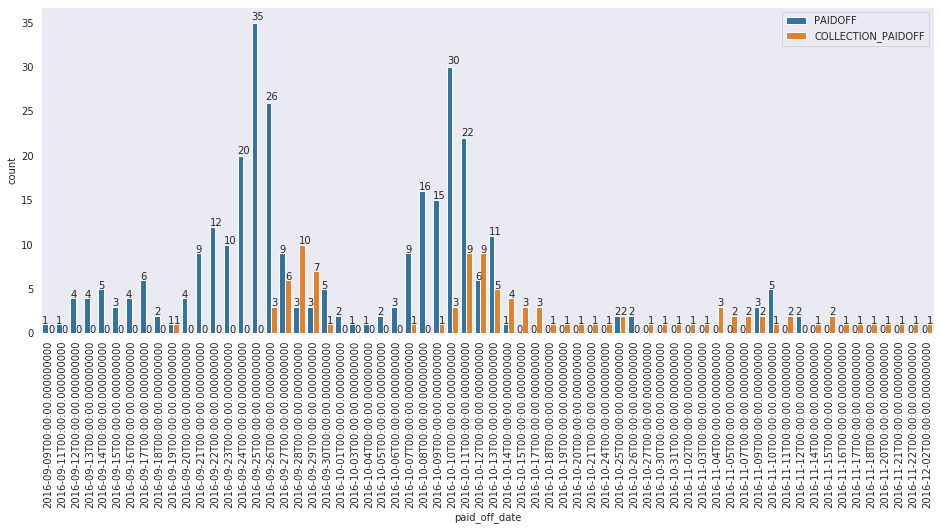

In [128]:
loan_data['paid_off_date'] = pd.DatetimeIndex(loan_data.paid_off_time).normalize()
fig = plt.figure(figsize=(16, 6))
ax = sns.countplot(x='paid_off_date', data=loan_data.loc[loan_data.loan_status.isin(['COLLECTION_PAIDOFF', 'PAIDOFF'])] , hue='loan_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

ax.legend(loc='upper right')
plt.show();


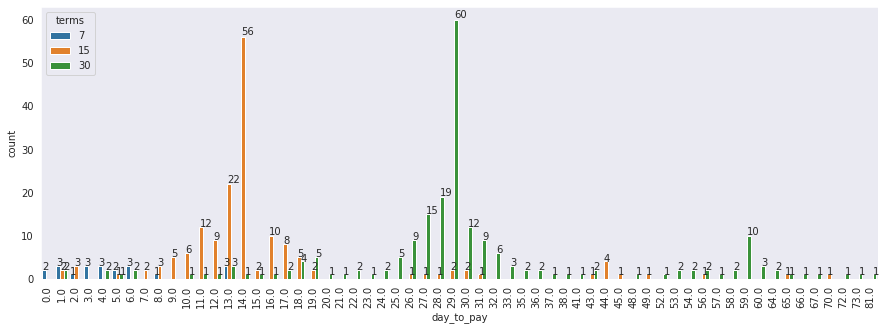

In [129]:
# Compute the day to pay-off the loan
loan_data['day_to_pay'] = (pd.DatetimeIndex(loan_data.paid_off_time).normalize() - pd.DatetimeIndex(loan_data.effective_date).normalize()) / np.timedelta64(1, 'D')

fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='day_to_pay', hue='terms', data=loan_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        
plt.show();



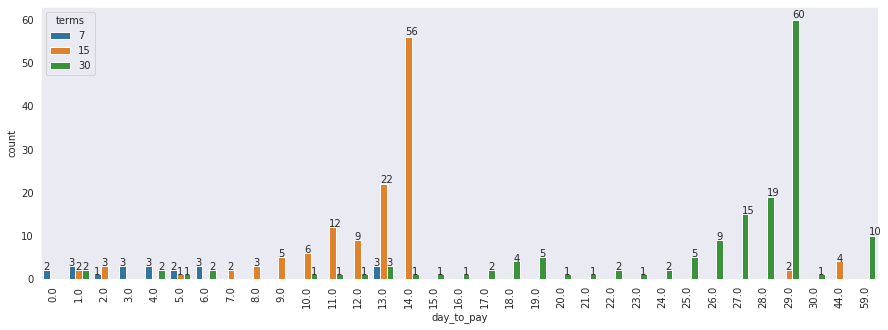

In [130]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='day_to_pay', hue='terms', data=loan_data.loc[loan_data.loan_status == 'PAIDOFF'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        
plt.show();

In [131]:
tmp = loan_data.loc[(loan_data.day_to_pay > 30) & (loan_data.loan_status == 'PAIDOFF')]
print("{}: Incorrect status: {} observations".format(now(), tmp.shape[0]))
print(tmp[['loan_status', 'terms', 'effective_date', 'due_date', 'paid_off_time']])

2019-12-27 02:21:33: Incorrect status: 14 observations
    loan_status  terms effective_date    due_date     paid_off_time
85      PAIDOFF     30      9/11/2016   11/9/2016    11/9/2016 9:00
111     PAIDOFF     30      9/11/2016   11/9/2016    11/9/2016 9:00
122     PAIDOFF     15      9/11/2016  10/25/2016   10/25/2016 9:00
137     PAIDOFF     15      9/11/2016  10/25/2016   10/25/2016 9:00
146     PAIDOFF     30      9/11/2016   11/9/2016   11/9/2016 23:00
150     PAIDOFF     15      9/12/2016  10/26/2016   10/26/2016 9:00
165     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 16:00
196     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00
206     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00
215     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 16:00
222     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00
230     PAIDOFF     15      9/12/2016  10/26/2016   10/26/2016 9:00
272     PAIDOFF     30      9/14/2016  11/12/2016   11/12/201

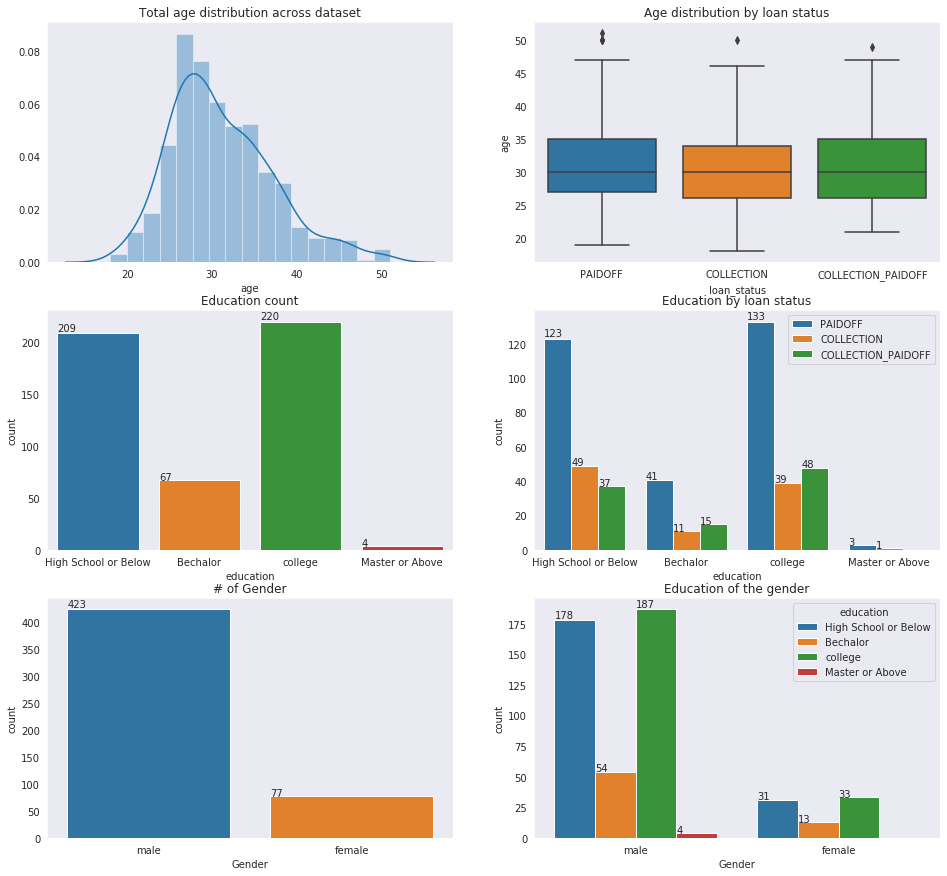

In [132]:
fig, axs = plt.subplots(3, 2, figsize=(16, 15))
sns.distplot(loan_data.age, ax=axs[0][0])
axs[0][0].set_title("Total age distribution across dataset")
sns.boxplot(x='loan_status', y='age', data=loan_data, ax=axs[0][1])
axs[0][1].set_title("Age distribution by loan status")
sns.countplot(x='education', data=loan_data, ax=axs[1][0])
axs[1][0].set_title("Education count")
for t in axs[1][0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1][0].annotate('', (t.get_x(), 0))
    else:
        axs[1][0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

sns.countplot(x='education', data=loan_data, hue='loan_status', ax=axs[1][1])
axs[1][1].set_title("Education by loan status")
for t in axs[1][1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1][1].annotate('', (t.get_x(), 0))
    else:
        axs[1][1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

axs[1][1].legend(loc='upper right')
sns.countplot(x='Gender', data=loan_data, ax=axs[2][0])
axs[2][0].set_title("# of Gender")
for t in axs[2][0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[2][0].annotate('', (t.get_x(), 0))
    else:
        axs[2][0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

sns.countplot(x='Gender', data=loan_data, hue='education', ax=axs[2][1])
axs[2][1].set_title("Education of the gender")
for t in axs[2][1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[2][1].annotate('', (t.get_x(), 0))
    else:
        axs[2][1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

plt.show();

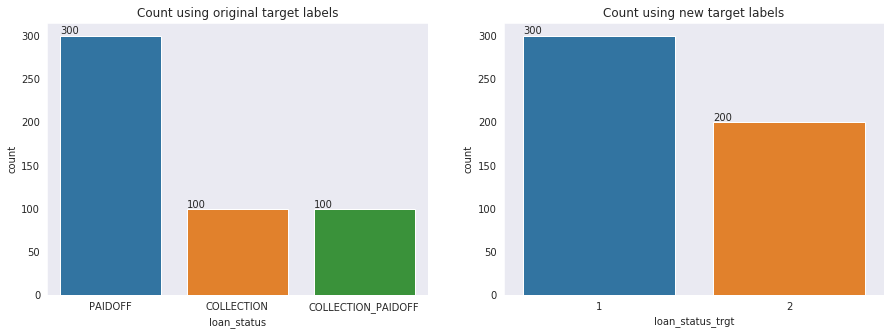

In [134]:
status_map = {"PAIDOFF": 1, "COLLECTION": 2, "COLLECTION_PAIDOFF": 2 }
loan_data['loan_status_trgt'] = loan_data['loan_status'].map(status_map)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='loan_status', data=loan_data, ax=axs[0])
axs[0].set_title("Count using original target labels")
for t in axs[0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[0].annotate('', (t.get_x(), 0))
    else:
        axs[0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

sns.countplot(x='loan_status_trgt', data=loan_data, ax=axs[1])
axs[1].set_title("Count using new target labels")
for t in axs[1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1].annotate('', (t.get_x(), 0))
    else:
        axs[1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [136]:
dummies = pd.get_dummies(loan_data['education']).rename(columns=lambda x: 'is_' + str(x))
loan_data = pd.concat([loan_data, dummies], axis=1)
loan_data = loan_data.drop(['education'],  axis=1)

dummies = pd.get_dummies(loan_data['Gender']).rename(columns=lambda x: 'is_' + str(x))
loan_data = pd.concat([loan_data, dummies], axis=1)
loan_data = loan_data.drop(['Gender'], axis=1)

loan_data = loan_data.drop(['Loan_ID', 'loan_status', 'effective_date', 'due_date', 'paid_off_time', 'past_due_days', 'paid_off_date', 'day_to_pay'], axis=1)


In [137]:
dummy_var = ['is_female', 'is_Master or Above']
loan_data = loan_data.drop(dummy_var, axis = 1)

print(loan_data.head(2))


   Principal  terms  age  loan_status_trgt  is_Bechalor  \
0       1000     30   45                 1            0   
1       1000     30   50                 1            1   

   is_High School or Below  is_college  is_male  
0                        1           0        1  
1                        0           0        0  


In [138]:
# ML library

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### Create function to evaluate the score of each classification model
def eval_model_classifier(model, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    model.fit(trainX, trainY)    
    return model.score(testX,testY)



In [139]:
### 1st round: RandomForestClassification

# Initialise values
num_estimators_array = np.array([1,5,10,50,100,200,500]) 
num_smpl = 5 # Test run the model according to samples_number
num_grid = len(num_estimators_array)
score_array_mu = np.zeros(num_grid) # Keep mean
score_array_sigma = np.zeros(num_grid) # Keep Standard deviation 
j=0

print("{}: RandomForestClassification Starts!".format(now()))
for n_estimators in num_estimators_array:
    score_array = np.zeros(num_smpl) # Initialize
    for i in range(0,num_smpl):
        rf_class = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        score_array[i] = eval_model_classifier(rf_class, X, y, 0.8)
        print("{}: Try {} with n_estimators = {} and score = {}".format(now(), i, n_estimators, score_array[i]))
    score_array_mu[j], score_array_sigma[j] = np.mean(score_array), np.std(score_array)
    j=j+1

print("{}: RandomForestClassification Done!".format(now()))

2019-12-27 02:23:51: RandomForestClassification Starts!
2019-12-27 02:23:51: Try 0 with n_estimators = 1 and score = 0.99
2019-12-27 02:23:51: Try 1 with n_estimators = 1 and score = 1.0
2019-12-27 02:23:51: Try 2 with n_estimators = 1 and score = 0.97
2019-12-27 02:23:51: Try 3 with n_estimators = 1 and score = 1.0
2019-12-27 02:23:51: Try 4 with n_estimators = 1 and score = 1.0
2019-12-27 02:23:51: Try 0 with n_estimators = 5 and score = 1.0
2019-12-27 02:23:51: Try 1 with n_estimators = 5 and score = 1.0
2019-12-27 02:23:51: Try 2 with n_estimators = 5 and score = 1.0
2019-12-27 02:23:51: Try 3 with n_estimators = 5 and score = 1.0
2019-12-27 02:23:51: Try 4 with n_estimators = 5 and score = 1.0
2019-12-27 02:23:51: Try 0 with n_estimators = 10 and score = 1.0
2019-12-27 02:23:51: Try 1 with n_estimators = 10 and score = 0.99
2019-12-27 02:23:51: Try 2 with n_estimators = 10 and score = 1.0
2019-12-27 02:23:51: Try 3 with n_estimators = 10 and score = 1.0
2019-12-27 02:23:52: Try 4 

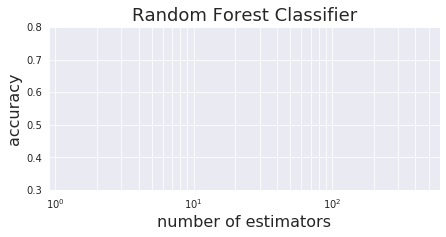

In [140]:
fig = plt.figure(figsize=(7,3))
plt.errorbar(num_estimators_array, score_array_mu, yerr=score_array_sigma, fmt='k.-')
plt.xscale("log")
plt.xlabel("number of estimators",size = 16)
plt.ylabel("accuracy",size = 16)
plt.xlim(0.9,600)
plt.ylim(0.3,0.8)
plt.title("Random Forest Classifier", size = 18)
plt.grid(which="both")
plt.show();

In [141]:
C_array = np.array([0.5, 0.1, 1, 5, 10])
score_array = np.zeros(len(C_array))
i=0
for C_val in C_array:
    svc_class = svm.SVC(kernel='linear', random_state=1, C = C_val)
    score_array[i] = eval_model_classifier(svc_class, X, y, 0.8)
    i=i+1

score_mu, score_sigma = np.me`an(score_array), np.std(score_array)

fig = plt.figure(figsize=(7,3))
plt.errorbar(C_array, score_array, yerr=score_sigma, fmt='k.-')
plt.xlabel("C assignment",size = 16)
plt.ylabel("accuracy",size = 16)
plt.title("SVM Classifier (Linear)", size = 18)
plt.grid(which="both")
plt.show();

SyntaxError: invalid syntax (<ipython-input-141-afc5ac06d938>, line 9)

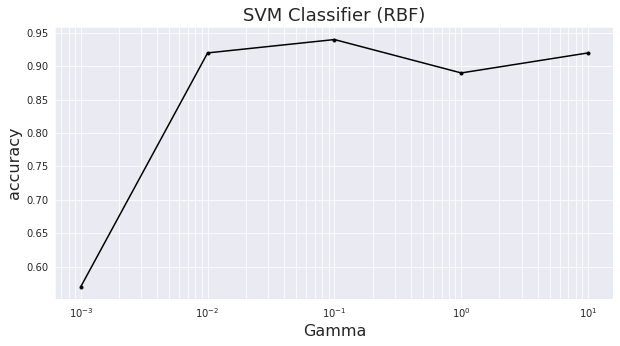

In [142]:
# Note: 
# Gamma: Kernel coefficient - the higher, it will try to exact fit to the training data, hence, can cause overfitting

gamma_array = np.array([0.001, 0.01, 0.1, 1, 10])
score_array = np.zeros(len(gamma_array))
score_mu = np.zeros(len(gamma_array))
score_sigma = np.zeros(len(gamma_array))
i=0
for gamma_val in gamma_array:
    svc_class = svm.SVC(kernel='rbf', random_state=1, gamma = gamma_val)
    score_array[i] = eval_model_classifier(svc_class, X, y, 0.8)
    score_mu[i], score_sigma[i] = np.mean(score_array[i]), np.std(score_array[i])
    i=i+1


fig = plt.figure(figsize=(10,5))
plt.errorbar(gamma_array, score_mu, yerr=score_sigma, fmt='k.-')
plt.xscale('log')
plt.xlabel("Gamma",size = 16)
plt.ylabel("accuracy",size = 16)
plt.title("SVM Classifier (RBF)", size = 18)
plt.grid(which="both")
plt.show();

<pre>







</pre>

****

Author : <a href="https://jimut123.github.io/" alt="Jimut page" target="_blank">Jimut Bahan Pal</a>

Purpose: IBM Machine Learning with Python course
